In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [7]:
file_path = r"C:\Users\zhang\Desktop\md\las_growth\19k_md_1108\xyz\0glass_300k_out.xyz"

In [8]:
def read_xyz_frames(file_path):
    frames = []
    current_frame = None

    with open(file_path, 'r') as file:
        lines = file.readlines()
        line_index = 0

        while line_index < len(lines):
            line = lines[line_index].strip()

            if line.isdigit():
                # 读取原子数
                if current_frame:
                    frames.append(current_frame)
                num_atoms = int(line)
                current_frame = {"num_atoms": num_atoms, "atoms": []}
                line_index += 2  # 跳过标题行 "Atoms"
            else:
                # 读取原子坐标
                if current_frame:
                    atom_data = line.split()
                    if len(atom_data) == 4:
                        element, x, y, z = atom_data
                        current_frame["atoms"].append({
                            "element": element,
                            "x": float(x),
                            "y": float(y),
                            "z": float(z)
                        })
                line_index += 1

        if current_frame:
            frames.append(current_frame)

    return frames

# 使用之前的frames列表
frames = read_xyz_frames(file_path)

# 找出最大的x、y和z值
max_x = max([max(frame["atoms"], key=lambda atom: atom["x"])["x"] for frame in frames])
max_y = max([max(frame["atoms"], key=lambda atom: atom["y"])["y"] for frame in frames])
max_z = max([max(frame["atoms"], key=lambda atom: atom["z"])["z"] for frame in frames])

print("Maximum X value:", max_x)
print("Maximum Y value:", max_y)
print("Maximum Z value:", max_z)


Maximum X value: 82.887812
Maximum Y value: 54.127768
Maximum Z value: 11.2587


In [109]:
min_x = min([min(frame["atoms"], key=lambda atom: atom["x"])["x"] for frame in frames])
min_y = min([min(frame["atoms"], key=lambda atom: atom["y"])["y"] for frame in frames])
min_z = min([min(frame["atoms"], key=lambda atom: atom["z"])["z"] for frame in frames])
print(min_x,min_y,min_z)

0.000453 0.000219 0.0


In [9]:
 # 模拟中的周期性边界条件，假设每个维度的边界大小
box_size = np.array([max_x, max_y, max_z])  # 根据您的模拟设置
print(box_size)
print('frames length:',len(frames))

[82.887812 54.127768 11.2587  ]
frames length: 10


In [61]:
# 我们采用非周期的计算 就是不考虑边界上的Nb的键角 暂时这么比较简单
dis_Nb_O = 1.8
Nb_x_min,Nb_x_max = dis_Nb_O, max_x - dis_Nb_O
Nb_y_min,Nb_y_max = dis_Nb_O, max_y - dis_Nb_O
Nb_z_min,Nb_z_max = dis_Nb_O, max_z - dis_Nb_O
# 分析哪一帧
ana_frame = 1

In [62]:
# frames[ana_frame]['atoms']

# 先画一个二维的原子数密度

In [63]:
coordinates = []
for i in frames[ana_frame]['atoms']:
    x,z,y = i['x'],i['y'],i['z']
    atom = [x, y, z]
    coordinates.append(atom)
coordinates = np.array(coordinates)

# 自动的 color bar

# 原始的 自动标注color bar 的图

# 定义网格的范围和步长
x_min, x_max = coordinates[:, 0].min(), coordinates[:, 0].max()
y_min, y_max = coordinates[:, 1].min(), coordinates[:, 1].max()
grid_step = 1.5  # 网格步长，根据需要调整

# 创建网格
x_grid, y_grid = np.meshgrid(np.arange(x_min, x_max + grid_step, grid_step), np.arange(y_min, y_max + grid_step, grid_step))

# 初始化一个存储原子数的矩阵
atom_count = np.zeros_like(x_grid)

# 统计每个区域中的原子数量
for atom in coordinates:
    x, y, _ = atom
    x_idx = int((x - x_min) / grid_step)
    y_idx = int((y - y_min) / grid_step)
    atom_count[y_idx, x_idx] += 1

# 绘制热力图
plt.figure(figsize=(10, 8))
plt.imshow(atom_count, extent=(x_min, x_max, y_min, y_max), origin='lower', cmap='hot', interpolation='nearest', aspect='auto')
plt.colorbar(label='atoms number')
title = str(ana_frame)+' frames '
plt.title(title)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

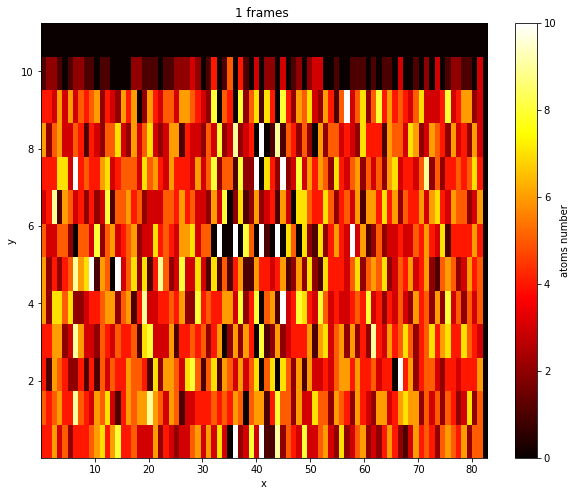

In [64]:
# 定义网格的范围和步长
x_min, x_max = coordinates[:, 0].min(), coordinates[:, 0].max()
y_min, y_max = coordinates[:, 1].min(), coordinates[:, 1].max()
grid_step = 1  # 网格步长，根据需要调整

# 创建网格
x_grid, y_grid = np.meshgrid(np.arange(x_min, x_max + grid_step, grid_step), np.arange(y_min, y_max + grid_step, grid_step))

# 初始化一个存储原子数的矩阵
atom_count = np.zeros_like(x_grid)

# 统计每个区域中的原子数量
for atom in coordinates:
    x, y, _ = atom
    x_idx = int((x - x_min) / grid_step)
    y_idx = int((y - y_min) / grid_step)
    atom_count[y_idx, x_idx] += 1

# 绘制热力图color bar
min_value,max_value = 0,10
# 绘制热力图
plt.figure(figsize=(10, 8))
plt.imshow(atom_count, extent=(x_min, x_max, y_min, y_max), origin='lower', cmap='hot', interpolation='nearest', aspect='auto', vmin=min_value, vmax=max_value)
plt.colorbar(label='atoms number')
title = str(ana_frame)+' frames '
plt.title(title)
plt.xlabel('x')
plt.ylabel('y')
plt.show()


In [65]:
# 一维

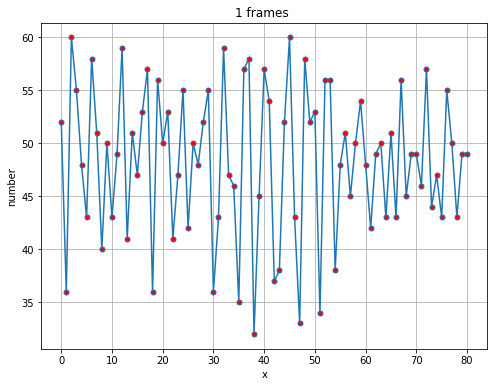

In [66]:
# 指定要计算的一维坐标轴（通常是x轴）
axis = 'x'  # 可以根据需要更改为 'y' 或 'z'

# 提取所选坐标轴的坐标值
if axis == 'x':
    positions = coordinates[:, 0]
elif axis == 'y':
    positions = coordinates[:, 1]
elif axis == 'z':
    positions = coordinates[:, 2]
else:
    raise ValueError("Invalid axis. Use 'x', 'y', or 'z'.")

# 指定计算数密度的区间和步长
min_position = positions.min()
max_position = positions.max()
bin_width = 1  # 可根据需要调整

# 计算数密度
hist, bins = np.histogram(positions, bins=np.arange(min_position, max_position + bin_width, bin_width))
density = hist 
bins,density = bins[:-2], density[:-2]
# 绘制一维数密度图
plt.figure(figsize=(8, 6))
plt.plot(bins[:-1], density, '-o', markerfacecolor='red', markersize=5)

plt.title(title)
plt.xlabel(f'{axis}')
plt.ylabel('number')
plt.grid(True)
plt.show()


# Nb的配位数计算

In [67]:
# 我们采用非周期的计算 就是不考虑边界上的Nb的键角 暂时这么比较简单
dis_Nb_O = 1.8
Nb_x_min,Nb_x_max = dis_Nb_O, max_x - dis_Nb_O
Nb_y_min,Nb_y_max = dis_Nb_O, max_y - dis_Nb_O
Nb_z_min,Nb_z_max = dis_Nb_O, max_z - dis_Nb_O
# 分析哪一帧
ana_frame = 1

In [68]:
ana_element = 'Si'

In [69]:
# 第一步 筛除边界附近的Nb

O_list,Nb_list = [],[]
# 先去除dic中Nb和O的坐标
for i in frames[ana_frame]['atoms']:
    if i['element']=='O':
        O_list.append([i['x'], i['y'],i['z']])
    elif i['element']==ana_element and (Nb_x_min<i['x']<Nb_x_max) and (Nb_y_min<i['y']<Nb_y_max) and (Nb_z_min<i['z']<Nb_z_max):
        Nb_list.append([i['x'], i['y'],i['z']])
    else:
        pass
print('O length: ',len(O_list),' Nb len: ',len(Nb_list))

O length:  2292  Nb len:  344


In [70]:
O_list[0]

[58.314312, 29.785668, 1.14355]

In [71]:
# 第二步 单独设置一个列表存贮每一个Nb的配位数的数值
Nb_Cn_list = [[] for i in range(len(Nb_list))]
print(Nb_Cn_list[0])

[]


In [72]:
def cal_3d_dis(point1, point2):
    """
    计算两个三维点之间的欧氏距离。
    
    Args:
    point1: 第一个三维点，表示为 [x1, y1, z1]
    point2: 第二个三维点，表示为 [x2, y2, z2]
    
    Returns:
    两点之间的欧氏距离
    """
    point1 = np.array(point1)
    point2 = np.array(point2)
    distance = np.linalg.norm(point1 - point2)
    return distance

In [73]:
# 遍历Nb列表 如果两个点的距离小于dis 则配位数加一
for i_Nb,Nb_point in enumerate(Nb_list):
    for j_O,O_point in enumerate(O_list):
        if cal_3d_dis(Nb_point,O_point)<dis_Nb_O:
            Nb_Cn_list[i_Nb].append(O_point)

In [74]:
# 统计配位数
Count_Nb_Cn = [len(i) for i in Nb_Cn_list]

In [75]:
x_list,z_list = [],[]
for i in (Nb_list):
    x_list.append(i[0])
    z_list.append(i[2])
cn_list = Count_Nb_Cn

In [76]:
Nb_list[0]

[21.777412, 7.491588, 6.98448]

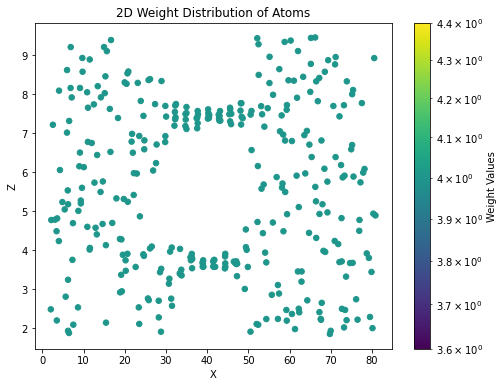

In [77]:
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm  # 用于对权重值取对数以更好地可视化

# 假设x_list包含原子的x坐标，z_list包含原子的z坐标，cn_list包含权重值
# x_list = [1.0, 2.0, 3.0, 4.0]  # 用您的实际数据替换这些示例数据
# z_list = [0.5, 1.0, 1.5, 2.0]  # 用您的实际数据替换这些示例数据
# cn_list = [0.1, 0.5, 0.8, 0.3]  # 用您的实际数据替换这些示例数据

# 创建画布
plt.figure(figsize=(8, 6))

# 绘制二维权重值分布图
plt.scatter(x_list, z_list, c=cn_list, cmap='viridis', s=30, norm=LogNorm())

# 添加颜色栏
cbar = plt.colorbar()
cbar.set_label('Weight Values')

# 添加标题和坐标轴标签
plt.title('2D Weight Distribution of Atoms')
plt.xlabel('X')
plt.ylabel('Z')

# 显示图形
plt.show()


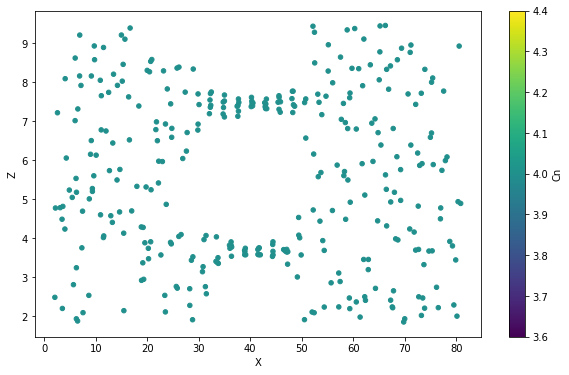

In [78]:
import matplotlib.pyplot as plt
import numpy as np

# 假设 x_list、z_list 和 cn_list 包含了相应的数据

# 创建一个图形
plt.figure(figsize=(10,6))

# 使用scatter函数绘制散点图，其中x和z是原子的坐标，c是权重值，s是点的大小
plt.scatter(x_list, z_list, c=cn_list, s=20, cmap='viridis')

# 添加颜色栏
cbar = plt.colorbar()
cbar.set_label('Cn')


# 设置坐标轴标签
plt.xlabel('X')
plt.ylabel('Z')

# 显示图形
plt.show()


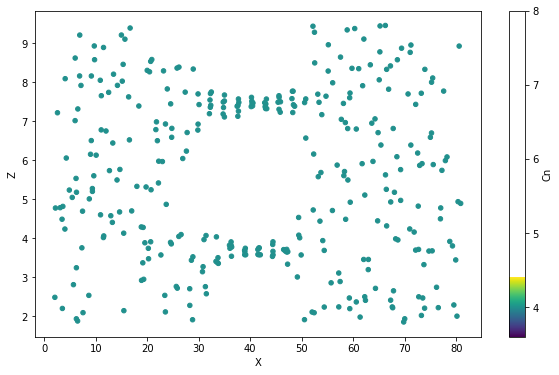

In [79]:
import numpy as np
import matplotlib.pyplot as plt

# 创建一个图形
plt.figure(figsize=(10, 6))
for i in range(len(cn_list)):
    if cn_list[i]>8:
        cn_list[i]=8
# 使用scatter函数绘制散点图，其中x和z是原子的坐标，c是权重值，s是点的大小
plt.scatter(x_list, z_list, c=cn_list, s=20, cmap='viridis')

# 添加颜色栏
cbar = plt.colorbar()

# 限制colorbar的标注范围为4到8
cbar.set_ticks([4, 5, 6, 7, 8])
cbar.set_label('Cn')

# 设置坐标轴标签
plt.xlabel('X')
plt.ylabel('Z')

# 显示图形
plt.show()


# 键角计算

In [80]:
center_atom = 'Si'
edge_atom = 'O'

In [81]:
# 我们采用非周期的计算 就是不考虑边界上的Nb的键角 暂时这么比较简单
dis_Nb_O = 1.8

# 分析哪一帧
ana_frame = 5
########
center_x_min, center_x_max = dis_Nb_O, max_x - dis_Nb_O
center_y_min, center_y_max = dis_Nb_O, max_y - dis_Nb_O
center_z_min, center_z_max = dis_Nb_O, max_z - dis_Nb_O
print(center_x_min, center_x_max)
print(center_y_min, center_y_max)
print(center_z_min, center_z_max)

1.8 81.087812
1.8 52.327768000000006
1.8 9.458699999999999


In [82]:
center_list, edge_list = [],[]

# 先去除dic中Nb和O的坐标
for i in frames[ana_frame]['atoms']:
    if i['element']== edge_atom:
        edge_list.append([i['x'], i['y'],i['z']])
        
    elif i['element']== center_atom and (center_x_min<i['x']<center_x_max) and (center_y_min<i['y']<center_y_max) and (center_z_min<i['z']<center_z_max):
        center_list.append([i['x'], i['y'],i['z']])
    else:
        pass
print('edge length: ',len(edge_list),' center len: ',len(center_list))

edge length:  2292  center len:  346


In [83]:
# 计算键角 

In [84]:
def cal_3d_dis(point1, point2):
    """
    计算两个三维点之间的欧氏距离。
    
    Args:
    point1: 第一个三维点，表示为 [x1, y1, z1]
    point2: 第二个三维点，表示为 [x2, y2, z2]
    
    Returns:
    两点之间的欧氏距离
    """
    point1 = np.array(point1)
    point2 = np.array(point2)
    distance = np.linalg.norm(point1 - point2)
    return distance

In [85]:
def calculate_angle_ABC(A, B, C):
    # pointA, pointB, pointC 是三个点的坐标，每个点是一个包含三个值的列表或元组
    A = np.array(A)
    B = np.array(B)
    C = np.array(C)

    BA = A - B 
    BC = C - B
    
    # 检查是否 A、B、C 共线
    angle_ABC = 180
    if np.cross(BA, BC).any() != 0:
        # 三个点不共线，可以继续计算角度
        cosine_theta = np.dot(BA, BC) / (np.linalg.norm(BA) * np.linalg.norm(BC))
        angle_ABC = np.degrees(np.arccos(cosine_theta))
        
    else:
        angle_ABC = 180.0
        # 三个点共线，无法计算角度
    return angle_ABC



In [86]:
# 用法示例
A = np.array([1, 0, 0])
B = np.array([0, 0, 0])
C = np.array([1, 1, 0])
angle_ABC = calculate_angle_ABC(A, B, C)
print("角 ABC 的度数为", angle_ABC)


角 ABC 的度数为 45.00000000000001


In [87]:
# 示例用法
point1 = [1, 2, 3]
point2 = [4, 5, 6]
distance = cal_3d_dis(point1, point2)
print("两点之间的距离:", distance)

两点之间的距离: 5.196152422706632


In [88]:
# 得出需要计算的原子

In [89]:
center_Cn_list = [[] for _ in range(len(center_list))]
# 遍历Nb列表 如果两个点的距离小于dis 则配位数加一
for i_Nb,Nb_point in enumerate(center_list):
    for j_O,O_point in enumerate(edge_list):
        if cal_3d_dis(Nb_point,O_point)<dis_Nb_O:
            center_Cn_list[i_Nb].append(O_point)

In [90]:
len(center_list)

346

In [91]:
center_Cn_list[0]

[[23.391812, 7.002338, 6.66726],
 [22.076112, 8.502128, 8.25108],
 [20.776612, 6.627528, 7.28583],
 [21.591012, 8.630468, 5.65324]]

In [92]:
count = 0
for i in center_Cn_list:
    if len(i)!=2:
        count+=1
print(count)

346


In [93]:
# 分析 每个原子和周围的键角 先算出来之后 再考虑如何画出二维分布

In [94]:
center_BAD_list = [[] for _ in range(len(center_Cn_list))]

for i_center,center_xyz in enumerate(center_list):
    for j_edge in range(len(center_Cn_list[i_center])):
        for k_edge in range(j_edge+1,len(center_Cn_list[i_center])):
            
            # 如果是O 不是两个Nb的就忽略
            if center_atom == 'O' and len(center_Cn_list[i_center])!=2:
                # print(center_Cn_list[i_center],'xxxx')
                angle = -1
                center_BAD_list[i_center].append(angle)
            else:    
                angle = calculate_angle_ABC(center_Cn_list[i_center][j_edge], center_xyz, center_Cn_list[i_center][k_edge])
                # print(angle,(center_Cn_list[i_center][j_edge], center_xyz, center_Cn_list[i_center][k_edge]))
                center_BAD_list[i_center].append(angle)

In [95]:
# center_BAD_list

In [96]:
len(center_BAD_list)

346

In [97]:
count,count1 = 0,0
for i in range(len(center_BAD_list)):
    # 如果是空
    if center_BAD_list[i]==[]:
        #print(center_BAD_list[i])
    # 如果有多个值
        count+=1
    if center_BAD_list[i] == [-1,-1,-1]:
        count1+=1
print(count,count1)

0 0


In [98]:
# 先画出一维的键角分布
draw_x_list, draw_angle_list = [],[]
   
for i_angle,angle_list in enumerate(center_BAD_list):
    for j in angle_list:
        draw_x_list.append(center_list[i_angle][0])
        draw_angle_list.append(j)

In [99]:
# 画O-Nb-O的二维分布

# 先画出一维的键角分布
draw_x_list, draw_z_list, draw_angle_list = [],[],[]
   
for i_angle,angle_list in enumerate(center_BAD_list):
    for j in angle_list:
        draw_x_list.append(center_list[i_angle][0])
        draw_z_list.append(center_list[i_angle][2])
        draw_angle_list.append(j)

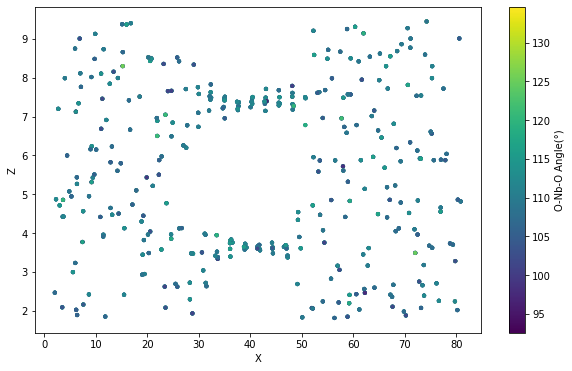

In [100]:
x_list,z_list,cn_list = draw_x_list, draw_z_list, draw_angle_list

# 创建一个图形
plt.figure(figsize=(10, 6))

# 使用scatter函数绘制散点图，其中x和z是原子的坐标，c是权重值，s是点的大小
plt.scatter(x_list, z_list, c=cn_list, s=10, cmap='viridis')

# 添加颜色栏
cbar = plt.colorbar()

# # 限制colorbar的标注范围为4到8
# cbar.set_ticks([4, 5, 6, 7, 8])
cbar.set_label('O-Nb-O Angle(°)')

# 设置坐标轴标签
plt.xlabel('X')
plt.ylabel('Z')

# 显示图形
plt.show()


In [101]:
len(draw_x_list)

2073

In [102]:
len(draw_angle_list)

2073

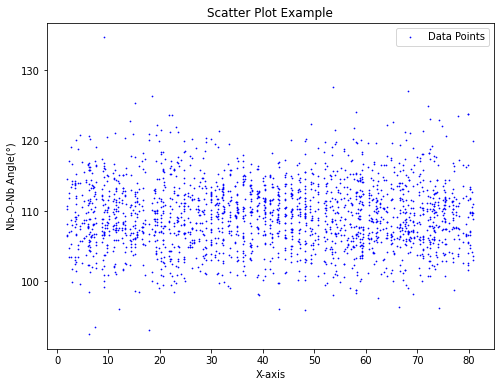

In [103]:
plt.figure(figsize=(8, 6))

# 使用scatter函数绘制散点图
plt.scatter(draw_x_list, draw_angle_list, s=0.5,label='Data Points', color='b', marker='o')

# 添加标题
plt.title('Scatter Plot Example')

# 添加坐标轴标签
plt.xlabel('X-axis')
plt.ylabel('Nb-O-Nb Angle(°)')

# 显示图例
plt.legend()

# 显示图形
plt.show()


In [104]:
# 画出Nb-O-Nb的键角的二维分布

In [105]:
# 得到O x，z，angle 的list值
error_x_list,error_z_list = [],[]

O_x_list, O_z_list,O_angle = [],[],[]

for xyz_atom,angle in zip(center_list,center_BAD_list):
    if angle!=[] and angle!=[-1,-1,-1]:
        O_x_list.append(xyz_atom[0])
        O_z_list.append(xyz_atom[2])
        O_angle.append(angle)
    else:
        error_x_list.append(xyz_atom[0])
        error_z_list.append(xyz_atom[2])
print(len(O_x_list),len(O_z_list),len(O_angle))
print(len(error_x_list))

346 346 346
0


ValueError: 'c' argument must be a color, a sequence of colors, or a sequence of numbers, not [[104.34271260442966, 116.14480146595852, 109.1277260640988, 101.25889882811296, 109.70156646016048, 115.25388688334341], [105.89389885119601, 111.2410489740733, 112.93005119653913, 115.65457160934994, 100.72181599956953, 110.02371323196688], [107.6041069437632, 114.03928003105233, 113.06263340990442, 107.34748647129763, 111.66792395205891, 103.02171404935461], [108.10823876424877, 111.82509972282283, 115.32543590735652, 108.1607772040821, 99.13130930232873, 113.17993688045657], [104.33956275930703, 116.46255036160974, 117.1235769798969, 115.29844626541549, 99.53285759554532, 103.23609212762507], [109.88104574057256, 110.57340949738496, 112.40876845222151, 108.45958656188353, 108.45324496294509, 106.93613735472223], [123.66113414696659, 108.48384623957573, 103.543354361984, 107.4332908162038, 104.31175854403119, 108.57006742732825], [114.01703724737969, 103.2408901931911, 108.09227537443971, 110.30836356053445, 103.19899485960748, 118.38533949508876], [101.3589681291087, 114.41143944017882, 119.69651978361378, 112.73876292926344, 100.97917251966028, 106.7977269885311], [105.5628062174869, 108.36398960926321, 101.87298239039458, 116.600678518838, 119.1181401841591, 104.02597349049273], [112.63685480471287, 105.29681907606982, 107.48073367561493, 109.50572669163783, 111.51277287566178, 110.21291788908778], [103.17871333346673, 108.5282677269642, 116.88102399597877, 107.11460173528734, 117.70908190135496, 102.9224950805146], [102.33004235563307, 121.52065021676546, 108.7894153686211, 105.48124403910289, 111.71284272901977, 106.88075471837237], [105.55974958136127, 111.74086663368709, 106.64137262304045, 113.07890082973174, 107.20477909890184, 112.1561023020183], [106.35389284776619, 113.19719920444851, 105.35420191506351, 107.93962980161925, 117.47166250875428, 106.72332457856818], [107.5186180077192, 104.70690642355858, 120.48173826951296, 108.07888715010894, 110.15745912891913, 105.20072401991052], [115.86606446882837, 108.92769280995215, 106.96617958970216, 104.74455164442546, 111.50336364692915, 108.6434439272545], [107.85162124054811, 124.11508641597082, 98.7627812412605, 115.3530164957155, 109.67484552707623, 98.33183302872789], [109.8541466177111, 113.68152667905404, 108.54068002694557, 107.79945069398427, 102.44974503125366, 113.88875733782622], [109.99024970895353, 112.617914969059, 114.32073662453932, 115.43334007550665, 106.31515999637584, 97.59697908696636], [111.20298210559596, 105.97800366704666, 117.29776575350485, 104.70543006267125, 109.32134007927947, 107.46435867572983], [111.04381528896131, 104.78446867589543, 114.61397455094223, 103.33044705633652, 104.1164711616876, 118.40258842623669], [109.77470499096721, 106.84850339783306, 105.94485553051166, 99.55663382755593, 118.39959716505157, 115.80052648359474], [105.10692418738687, 103.48573739929184, 104.54572434327719, 118.73893663720486, 113.93972539609038, 109.36273899089261], [117.09689024259723, 100.84291388943986, 105.94861539610284, 110.53995453242999, 105.29053634675293, 117.5814110089574], [119.66756001416964, 106.45243386166757, 105.4453393269598, 111.74121728745126, 101.57294178244801, 111.73465629327808], [99.81312460336781, 105.84299043225991, 122.27070800127561, 108.51046366502727, 107.9558460826752, 111.32995222589459], [107.64317659753517, 108.49244309493822, 110.30272142325008, 111.86941007930868, 105.45647711080593, 112.94207080620805], [111.63329140394112, 118.2603517402189, 105.31205553517377, 105.28686616967367, 108.27358417386262, 107.72179049353453], [110.71096129755237, 106.03159470966007, 109.65748223187886, 106.05210590316673, 107.28343204478209, 117.03544532881106], [107.65908570336408, 101.54110000469552, 113.04220323494357, 119.40739008188662, 107.09985957127337, 108.21565812426394], [116.45194603611809, 106.75941789386971, 105.12452506337314, 111.73361562600935, 102.67291776129642, 114.12834630019498], [108.98292116363976, 110.31046671373967, 107.79695806107998, 108.78488378404451, 111.44787051047582, 109.51352744318362], [112.06492422119341, 106.63673125349699, 106.73844865106453, 108.1326751164465, 116.25509068339146, 106.4809951754114], [105.6831278156268, 111.73711398479742, 109.18536067733994, 107.61554285148647, 116.14470098042085, 106.56248841992779], [106.79198441402599, 105.54799778947864, 113.71540580964665, 117.7765509903232, 108.42318148535026, 104.82679046013631], [105.92949724127246, 102.33408412176789, 107.4935730394548, 122.82179045940441, 110.57290739327716, 106.56342602639234], [107.61626488483927, 115.90471842413805, 105.28057580054613, 110.67591821628851, 114.64834387871083, 102.78854213950048], [106.03752240036498, 117.09669117989415, 107.7204012375717, 110.75305868869594, 107.75568186596749, 107.12408907646359], [103.95973424573445, 101.07578955422461, 105.83771477460122, 119.80820839058035, 110.93717284800042, 113.23458259523669], [107.20932903405543, 104.89995073450937, 110.70375878326267, 113.29188151712508, 104.13358407324318, 116.38379483779363], [106.75804768970882, 103.71172452282428, 106.57773451137153, 114.7917845325723, 116.84870023552949, 107.05679253372026], [106.00176564530427, 117.73018130591818, 110.65645818809158, 109.71933745018278, 103.87588596403708, 107.97783954155646], [112.19987131066974, 106.10766424659934, 98.75944889455158, 111.76716906911496, 119.77711930982062, 106.78358178590156], [120.79150372200009, 103.88081357635181, 104.05376254288616, 117.06479621588896, 104.8889736322459, 104.30281247873091], [108.92887650360177, 103.05400050814043, 114.75974066668441, 112.14294046036694, 110.40728167461914, 107.39289350077456], [115.28466949733432, 101.45657941607584, 111.055314983033, 106.74940800230705, 102.73092859807433, 120.12500589108703], [115.76778901565297, 111.45994802334602, 104.35769134951506, 104.88998858079698, 108.83356168550345, 111.66053382614132], [103.60778636787033, 106.60637402414636, 107.58097121034967, 123.51565144140416, 110.75287474011527, 103.93460474796935], [108.95905344904101, 110.89307481217429, 109.78216753150754, 110.46895176307461, 112.97416952931253, 103.70059579539402], [107.05869365070774, 114.81211690200499, 104.10322585229284, 112.83851469973055, 110.80849225567269, 106.89140032566858], [117.4126408061136, 108.65808436573879, 100.9837799449418, 108.21865528198626, 115.49722615358513, 105.22934047886395], [121.41521188990846, 104.47077947995628, 103.3891468972563, 112.7907465772397, 104.5496434435063, 109.52824009438729], [103.50172882057161, 112.25848317811212, 102.72688924191534, 114.70386741432627, 111.70836272077355, 111.0705086648842], [96.22524315328995, 105.82829317172927, 110.39490242302752, 111.91687613529503, 122.95704573443314, 107.85709664422365], [112.0809966281832, 106.22783817095157, 103.93645786031799, 108.75158122675904, 100.79976809180796, 124.9221692579822], [116.60738807323494, 109.56470794181332, 108.03967189567912, 105.89407711320406, 102.23180555873164, 114.57241576342693], [113.20959563551372, 108.17242874163868, 103.61296499050113, 113.48398653463002, 107.98448021428477, 109.90417048528866], [120.90400595418915, 108.12183169399336, 105.77269687706429, 93.10096205481642, 120.02252639848842, 106.69777321356156], [110.00935231974692, 108.85454320502238, 106.52883341237187, 106.63199731646073, 112.91404631536112, 111.87128805592006], [108.81221383885082, 106.6014237926359, 111.91781442151371, 109.15162535217355, 108.18547765442491, 112.10366543569101], [102.97421234737, 113.30136729559023, 114.19745323513453, 109.10566005125554, 114.01596318849033, 103.47149280788904], [111.32613113483244, 105.35469124750601, 112.73555868406262, 108.64774705785102, 112.1123892687419, 106.22130854822638], [108.17724614668359, 113.222859309624, 112.78035667432866, 115.06765292694307, 101.59847150788093, 105.47651756655517], [106.64564133043368, 112.71671899061931, 107.01212476811241, 106.62480865818763, 109.64320424059405, 113.9548568761057], [114.45218751190511, 103.45128101446646, 109.47734677307115, 114.4344532344416, 102.50151875807296, 112.76201377742551], [117.48352472484748, 106.77044854997646, 103.68124284880898, 109.84351003326218, 104.56081197654875, 114.66828064935048], [114.41111511864865, 108.28331545183342, 110.76547847819657, 104.24286146913813, 107.1359900518849, 111.89035632054494], [111.22077527867366, 99.8417464040842, 121.882290355949, 114.96006666338648, 106.64452764397446, 102.17362155515819], [112.4048373178021, 112.72231192434353, 110.58211918709864, 108.99691385287537, 93.59179686560637, 117.0862298488419], [113.02362158464041, 105.56268618946527, 111.1674489960943, 115.88877853139107, 104.4007393678582, 106.7048954784036], [104.93588396599068, 118.49090626369201, 113.49175955878316, 114.27067470287015, 103.73495261182265, 101.18641423225247], [104.7086811682155, 114.53844893559572, 106.97600504153209, 111.89536323817784, 119.99791569536433, 99.07846980566046], [106.97915784971487, 113.08441013004753, 113.0849028163391, 109.87319759162274, 107.10983862376474, 106.55467494682104], [102.40027520579149, 116.25057376425569, 120.63436664178941, 105.82346123557086, 92.53806112071565, 113.82848714117723], [120.89089045391245, 110.19622868464336, 106.87687305937274, 107.8947610745664, 103.8179287018, 106.0746925386764], [107.30402735654539, 115.8350716258355, 109.00079032031267, 102.51042743926835, 121.05891738216687, 101.38003305730221], [108.60533258420305, 104.74276633755382, 112.56285878973655, 120.4267939311449, 107.52568137420334, 103.00353799719116], [107.38350944698207, 112.10178056472543, 109.34423558137748, 102.6536696668052, 112.81384933911164, 112.33979635641256], [110.33355058267513, 106.45094434176116, 110.7073581253562, 114.55447861692743, 108.14463909345595, 106.59411936761394], [106.44517046079655, 117.24924043927653, 109.36579145951185, 110.99637223884127, 110.91061257061398, 101.85539297415686], [112.01253096989821, 114.29258358036306, 105.32948607032468, 110.27083761136791, 106.58195926244316, 107.85506958010149], [103.75918408931722, 107.5676188997338, 107.95519428108406, 115.89527515890579, 110.14189921414908, 110.97248997869977], [109.96517445690571, 106.0991529653034, 114.44460082130314, 107.63222051251985, 101.8987659624625, 116.52021629602717], [106.74336924604759, 106.92669814973326, 108.07818201586541, 110.70998311402977, 115.83482859247742, 108.16458006191034], [102.87067564235639, 118.25763007137296, 105.92977482954106, 118.30256102880516, 101.84069528747713, 107.86980758562179], [106.09413686768144, 110.04192576272554, 111.01608723839504, 107.85709355445967, 119.27511822512723, 102.34423379659394], [107.0675752231647, 114.4286131870869, 106.04663967078956, 109.14931561964845, 114.4475815019399, 105.87479863806021], [110.39755728650142, 106.02700983835743, 116.31102643164728, 103.9242198383126, 103.98405650379355, 115.49283474788186], [109.15463776005686, 116.55838612193708, 104.03766032796463, 101.67458358866615, 123.71361743434109, 102.32183662855753], [134.64524124262695, 99.13908677650205, 106.60262192272391, 100.8544357159227, 100.131624865285, 116.39382437968105], [105.3899800796244, 120.26082730616756, 104.83406862897557, 101.96905240725143, 117.59892884677055, 107.5711198279506], [106.80638424140318, 109.08393079244489, 111.41679565837107, 111.28684557241301, 106.32615207041272, 111.79735864689968], [110.27020275138963, 112.01940684206518, 105.18378429278575, 116.56868237515307, 107.00557696267744, 104.88049515271284], [107.49584085058967, 115.4685405252357, 113.72721115608817, 106.66304906672094, 111.17055017273724, 102.10980452870848], [109.92475149883337, 111.84553602828201, 110.31200339667276, 111.53896275224706, 102.0346029696694, 110.77409675424958], [109.8726575043689, 102.34024401563497, 111.56988384706597, 107.57936672372836, 116.68310567172506, 107.70336743227035], [108.17216345829233, 112.14474968755975, 110.0695831278137, 106.77238845739909, 113.40114642441814, 106.29886870926802], [114.47382886322664, 107.04188187955819, 108.27723947729567, 109.08677914040537, 107.95025551868949, 109.97341809077605], [101.46892469759511, 115.80907364674941, 107.31533167590464, 114.1096371011468, 109.44670648557718, 108.31430796452942], [109.48220462990257, 113.58452650049992, 110.12778547820405, 105.71780450617267, 106.00450354543857, 111.53904407905203], [105.68055442630892, 117.02733784598404, 102.59387693060884, 112.25857529905078, 110.51671910027675, 108.30513531517794], [106.84788602678293, 108.670073562818, 110.01227995978053, 119.94652042928776, 110.67806166864459, 100.42379528671877], [108.9648575703909, 106.80262839051194, 105.01601706846616, 102.03208737206562, 112.30034195121392, 121.27964261653094], [104.91068798862388, 107.98011787162443, 111.91203739431423, 109.64924077009137, 115.73622426110558, 106.46171302861136], [112.53831361475888, 109.94196553807953, 109.76829424101274, 106.95390458038615, 108.62131896290751, 108.91869674275908], [111.7962998557292, 103.15690548339177, 106.82795775012663, 102.91592011928947, 110.76212069044075, 121.17394370142141], [113.3989372476157, 98.45908767424334, 104.89943674032995, 115.76841437155163, 107.83695250836585, 115.81124338446018], [109.81445023278059, 115.06346695400792, 108.39097727276271, 104.12531582931301, 114.29117462044154, 105.22493247459393], [108.2833204169203, 109.96652692370222, 114.75164559218682, 102.44041764734425, 107.16680238972512, 113.33613301548178], [110.20017976560726, 103.31054209708047, 115.33036589680009, 109.63558736758436, 106.63365020428446, 111.69947373607158], [105.84627902532347, 105.50087988048996, 114.6521790362052, 111.70963543465703, 113.32737021718721, 105.63610036780531], [100.12293823508506, 108.3649725671894, 112.610040800513, 115.96285413961414, 112.8929417615684, 106.85274730314268], [105.76150823276436, 108.02328589953471, 113.11152628794659, 109.71771039125619, 107.10524010427417, 112.85782229090482], [110.05258140744118, 103.1233545972568, 114.54238221735929, 109.71280454766496, 110.19957852725625, 108.93248377882878], [113.34612573289475, 117.4454130200148, 102.15877537790976, 104.9024552740659, 107.93091786708146, 110.85227306754872], [108.3500450858612, 117.61743290500445, 106.49810629615205, 103.72420862355231, 113.84463837028741, 107.08057576416888], [115.12417141321559, 104.88080558851533, 110.86338018116591, 109.4432259018235, 105.69975852739209, 110.90525569351654], [107.53002184141744, 98.81323826659224, 115.72300458072974, 116.36099922954635, 112.04509509610382, 105.96744342126593], [112.27727950810035, 111.68661196755633, 111.49448477933029, 105.92884228875715, 107.64261820231343, 107.50022298582212], [111.73387444724185, 104.85998174332535, 110.25515779196134, 112.39196938394329, 114.73008306946434, 102.0456721824774], [107.03291129513804, 111.40660223339286, 118.42461129548639, 110.53489771611775, 101.80576155553211, 107.14718809992212], [119.03697455645475, 107.09089629268209, 108.68204961484798, 105.35683648730729, 103.46087457630072, 113.40377058419321], [123.63785578906234, 102.49996859599864, 110.30588000854597, 100.82016794075237, 111.66526602690512, 105.35188685571329], [108.9178925950044, 115.87444362633997, 110.88112072530369, 108.87621072904854, 107.25164300899708, 104.66565620230664], [109.88638505669475, 102.2522754190477, 106.94530520405118, 106.97758187323204, 116.15796684232168, 113.7141591136041], [96.13583032563153, 115.16997362647331, 111.80139227617693, 107.59535662744844, 113.96187089643254, 111.33876525956961], [104.24906994259686, 100.85806125604604, 116.77834879984421, 118.02969972761663, 107.80806359497139, 109.3688518644132], [113.10334996208384, 112.85196453671855, 110.30886885340156, 107.65010220307595, 100.99268912254374, 111.32196248396806], [116.22382259440346, 107.01821035433039, 104.33870233315885, 120.22134616186075, 101.36587481582927, 105.78091535878855], [108.30656428060873, 118.95990146919847, 107.36999701483884, 103.27477044905632, 108.23664736413322, 110.24081790966106], [107.60390791849404, 107.32297867384973, 106.19673249379036, 111.15570016303985, 111.5946644066766, 112.61852099557565], [112.41089795520381, 114.09805231377915, 107.49574805068434, 110.85794414266718, 106.31316841192738, 105.02219501570157], [115.57965159780235, 108.39297219144831, 98.25674023671807, 111.46392201259557, 113.6085468303019, 108.64324499774362], [120.03899439952245, 110.27091129284966, 107.76942391717817, 100.30661002238607, 112.13549984372425, 105.19440456370097], [110.17911756824623, 111.77885149137188, 113.99425737933714, 102.32026207961087, 106.25404605983334, 111.51823382124358], [100.79205934199702, 106.64446793625106, 122.17362186133921, 117.76077728814471, 106.23031396143342, 104.19448201857924], [114.94734884085311, 110.40186480934977, 100.85267384162604, 108.34019684417325, 111.56434461619004, 110.59477792190096], [104.24688719083223, 112.56651440062896, 108.06679091352316, 117.60020499224437, 103.74230938678387, 109.88831088989137], [113.7939046240437, 113.54203224149313, 109.24123243586084, 104.68886917750886, 102.5226467950483, 112.52323240801292], [108.60826143960968, 111.43988271633322, 104.3942271706064, 105.71402113696217, 109.78542113868353, 116.74850072529686], [106.06156072546868, 112.23705889342513, 106.21951371391852, 109.07418783979809, 114.69259212829493, 108.59491222484891], [113.03092814063453, 107.34746248265634, 104.92589927080138, 111.07935316772392, 110.30224018489379, 109.93465610625701], [99.8877817475703, 101.78658524858243, 108.08129478348665, 116.6342273635746, 113.83013803662824, 114.30094464962431], [108.53544032548996, 106.11709250431316, 110.3718585428897, 106.96578012891092, 113.0995815939156, 111.43936482741317], [105.8157312970408, 111.60557921871477, 106.60051282656511, 101.24998000375024, 113.82952318270364, 117.25853177623304], [112.40450020828739, 107.1803876638482, 112.40213233192627, 111.04531080525776, 107.76407397260608, 105.87948828819196], [112.69031808606081, 110.58828048467028, 109.85289163876273, 109.4855355239948, 109.67441558928974, 104.20844906831974], [105.97779225196831, 120.037409583464, 99.43537736989305, 115.18027645598768, 105.76398720662931, 108.50857379760613], [115.49767464472077, 102.55094741797237, 107.81794512689059, 113.68732798993344, 103.41335725675778, 114.12337915186963], [108.83842732988985, 111.54613461028109, 109.81249866139913, 107.61198820759364, 105.16932120151372, 113.54863792030773], [107.6668091288388, 109.83953334832958, 115.74186868902113, 111.26622885594564, 111.37867746913943, 100.87224949844311], [109.11211438140991, 107.70000878874887, 104.99262796436962, 106.21640645222675, 113.50874073068027, 115.0960448793183], [114.00634982951814, 108.10077769896765, 99.71036781969478, 105.98842981120382, 112.79987420046542, 116.360366310909], [107.66125489092195, 109.7900347959026, 110.6971154903172, 111.69595244729071, 109.43798985666328, 107.57925752252044], [109.92581759032619, 112.55848806584717, 106.95049040151514, 113.54511126274681, 101.81838384941709, 111.34405807809658], [111.48629136207927, 105.91694232973357, 109.84540618717439, 100.13824252472888, 113.0875767985247, 115.88192576309086], [123.02759578479079, 117.34949772594543, 102.95645119111056, 100.75041555159555, 105.63927162846446, 105.57975918390497], [111.67193538345039, 114.46056524313636, 104.15147013913666, 108.48877397388075, 104.01575225954299, 113.569742286348], [109.49758842854501, 110.92257034856283, 105.48102083626809, 112.59329901148448, 111.23140932676488, 106.86322150421144], [107.10365867810063, 110.26239667420168, 113.74722042382481, 108.11612561505724, 109.66995247675798, 107.81583233999079], [107.64989527470523, 112.46612966358359, 106.10764005685725, 98.58976849832102, 104.94887890852006, 125.4049660025547], [114.6820661581665, 103.25726965306225, 110.15143947166437, 114.38511236435949, 105.03534838033313, 109.34670846788222], [111.57403862136148, 115.93536566924227, 106.1382232184023, 110.40247529009692, 104.82794627494835, 107.16270589005083], [122.62607643720077, 107.0813168226492, 100.09492981687639, 104.38079742417007, 113.0783910185092, 109.10036174383569], [113.01808976713512, 106.84204977189079, 116.77332331935865, 105.87969754573868, 103.8702406741146, 109.97660288579608], [113.00028030594909, 110.6229151884755, 103.3730677467351, 112.66582451510757, 109.70071373756802, 106.88848953951901], [119.90705103011048, 108.86922815711173, 102.98952913781409, 110.98225163621197, 103.65225729294417, 109.69386629478092], [103.33177918526793, 112.54726201226929, 112.64247454767307, 105.22914115853014, 106.56260356905614, 115.28876076696181], [108.95964916392997, 111.74109663519349, 102.85080939080123, 103.39017074196182, 121.53695495057455, 108.4829723545589], [108.21401273521941, 115.22075277617718, 103.70477549115388, 106.33084660893797, 114.17137944947052, 109.4410258658991], [107.12336610291086, 112.7999726805204, 109.22711245185606, 112.13350872407256, 108.85890962143887, 106.63145562962659], [102.2984127540547, 107.66125012100177, 114.51039889198908, 103.15207705335203, 104.9133645095282, 121.78508269650422], [119.67256491385285, 101.1760217628814, 106.59294728653995, 107.61756803295344, 106.09860571669668, 116.22891124832272], [101.1096310331055, 106.72224837586175, 115.15352241448097, 109.6935830447671, 119.47894479326482, 104.17389212868177], [116.63841073882455, 117.02182768058854, 105.69316336718691, 104.03896839241, 110.0502415467937, 102.47280052994736], [103.5891987130823, 118.77010599568402, 104.75969944594947, 108.86156200589627, 109.19121425081201, 111.14988709961291], [107.72378074720072, 112.09419362361228, 111.15416716569096, 108.84167631629865, 107.6544527070238, 109.23739043214037], [115.49066704087362, 111.44252562416185, 108.76053675468307, 108.23604137515399, 106.17744460774833, 106.2156097360776], [108.4999875837023, 106.01429113663588, 112.30722766264047, 112.74965572913462, 115.01112304272122, 101.83884109876735], [106.83686904205234, 112.69331823656209, 104.84503128677822, 114.97176584470382, 114.54566772151975, 102.61988012499646], [111.16676674161857, 107.95693715335085, 109.10220789407309, 117.18416137751248, 109.72547342353893, 101.08422130107287], [119.08001882411286, 104.2188675536465, 103.94768321992315, 111.89529447082174, 108.53673267591329, 108.51872240822574], [112.82750926375375, 105.24178879445812, 103.7973260787903, 104.26724945606428, 114.77309280457382, 115.77788699879514], [104.0257881130332, 107.44725202105148, 111.28178984725137, 111.41279449166137, 109.78882892305154, 112.54393004721504], [115.31923209931144, 112.93909167369091, 100.05521480489418, 114.2782271206302, 105.58258266432446, 106.94131187895245], [104.24991939372245, 105.79449832741757, 106.2824352051352, 121.04178430937564, 108.72757060669726, 109.66344419671486], [106.0164554331213, 115.80475083461307, 106.47091230750515, 114.44855768124738, 103.57662536590514, 109.55324703688184], [108.92720078992977, 114.36320710473345, 112.01915047898032, 111.48171334755934, 106.02792895818523, 103.65510108286792], [105.59836110470329, 106.62223899581113, 102.61846974323502, 105.4238903167193, 123.73884611141769, 111.57385933481969], [110.85823899949084, 108.80140442126462, 111.6338314260502, 102.99841675530527, 115.73630464507498, 106.13756656704236], [110.37723788073747, 106.37853042889684, 118.07551639530475, 110.19495178165519, 105.97902117141462, 105.65265591127623], [111.50965220066269, 105.3615400359396, 105.2126273111286, 117.91473916801968, 106.19834299908202, 109.99083552459507], [111.86612660255861, 109.75428053039244, 113.39586345803352, 111.6621656661915, 104.68274436563145, 105.23733395602626], [113.23695764313878, 106.28721647644929, 106.50424624102611, 110.25199266104353, 106.24744505337314, 114.42073196538433], [101.66712294459685, 117.33728746442505, 105.25129317059736, 121.19163875648191, 108.73298385783934, 101.60513091608183], [100.70531549308701, 114.36492789653023, 108.5706155594015, 110.3072159016621, 111.65502075297097, 110.86852189101555], [108.58240625795429, 109.74518074066383, 111.59059154560393, 113.74276298671748, 105.63738561678717, 107.51938196278434], [99.0093452109007, 107.16890743694943, 106.72339981110754, 127.00623373687918, 107.168743603445, 108.03117787701639], [106.88175615645939, 120.3345249124464, 108.02202755093931, 108.59508413432684, 104.23659138305639, 107.64538333988746], [102.20409124758812, 106.32284290444821, 109.12861659546628, 117.75666076979158, 110.09392954631598, 110.67151372284], [107.65005586827198, 96.43576940380154, 106.07453227590754, 116.81689316994303, 113.61603467957283, 113.94648801947353], [105.85286011784038, 111.26637016516719, 108.82581243588285, 110.21466288916038, 109.87724148240206, 110.68295098324059], [111.9142555767756, 113.4691731884495, 106.60297915067058, 102.40657030796048, 114.59552872949347, 107.95301249037915], [114.05635728147008, 108.74193998896769, 106.46015099750142, 103.74442678083527, 109.69841601759548, 114.34580060370057], [107.4293325720586, 107.68954534743531, 110.60661949334101, 115.08267002801276, 111.35273145274634, 104.62819757446172], [107.31661385431075, 106.7284819366518, 105.45323813754823, 107.68272303827908, 116.71622135339294, 112.37915428605959], [127.67718693778951, 115.67496279108444, 98.11636087236042, 100.69588311596291, 103.3577690109457, 110.07553316857212], [109.66917232597646, 108.06217388042685, 106.37223159215105, 116.60018960350064, 106.19733919429916, 109.48327164080658], [116.50723286826637, 101.18252939419341, 112.35517596432574, 106.73728485828669, 110.76503844081863, 108.41777368777149], [109.84737681945322, 107.84793211309886, 111.4756242115035, 107.49949796297757, 115.40176525977641, 104.29604171584107], [120.83148765979351, 99.5788857831842, 113.98004538910467, 107.93633065735338, 107.38186750299175, 105.71339753820507], [111.0896106168599, 100.08969561937703, 118.0554255345355, 110.41607763041631, 103.87773810568878, 113.45510329357703], [113.07081678404366, 98.53168307910208, 109.94511782363205, 107.30786763908245, 111.04581215142602, 116.45556380332089], [112.33231402943318, 112.96715612691284, 111.77825247561789, 105.96840893658151, 108.68491443322836, 104.64018073471603], [105.30758999041376, 111.53001391403112, 102.93507335821984, 120.71901846346286, 107.40744955740209, 107.48564984008131], [107.83836643674961, 116.53466820351177, 108.08982215109418, 110.91652567909163, 105.07276060808972, 107.75657089207265], [118.40296028309261, 114.71476385686542, 101.13806581398967, 111.17854161084736, 106.29758966440195, 102.87989931727155], [112.30932426073169, 117.34468063886648, 101.7639820037652, 107.6899165224288, 108.36124782580978, 108.93254343955601], [108.9287030496178, 111.18804875834377, 116.81719464122655, 115.88500493123797, 98.44374157997596, 105.23548966248548], [108.47853670588512, 107.36712588930784, 110.5226027085419, 110.05807337745549, 114.2485434102293, 105.94614058780103], [114.18432073957781, 111.24609588684446, 106.07192440921482, 103.76632298070408, 103.55540957123613, 118.06398203663576], [103.4276629587675, 117.05479614950987, 104.68759008526523, 107.0144111033991, 111.8544294392928, 112.53155098048398], [109.02787239988412, 109.67058796466452, 106.98805561066132, 110.2508837679506, 114.2777600310533, 106.50541664367309], [106.39192884699655, 106.84304997402405, 108.51005908802635, 111.88126444552627, 102.87236958507813, 119.63347373682247], [110.696178926309, 117.99508767578831, 108.82399502477482, 105.79123706885903, 108.46715599094635, 104.59381964406414], [116.5607610913525, 101.12558969966061, 109.21504411246178, 111.64433857277795, 105.54165444533336, 112.97364684084789], [102.87790232288354, 108.61433129555797, 122.00255304540902, 110.02239679349904, 105.64071100236944, 107.26819439701414], [114.53094498525861, 99.85221330121661, 108.68028430636723, 112.56238121390955, 107.25917718195123, 113.97498023849238], [111.99756971545304, 111.380745495916, 111.87959000185873, 105.35232974281816, 108.48516705971713, 107.42319626351455], [109.49485796928634, 111.55358675233217, 104.0774004829036, 113.62139006571321, 110.23925114719164, 107.40599268515722], [114.84824670521988, 104.03653286614573, 113.47467098025587, 104.93397052271614, 112.42234830764765, 105.92115963259768], [105.76089103760008, 115.23842126665791, 105.09373092931064, 104.91613668898064, 120.2150351432772, 106.15044151951666], [111.36892230828646, 110.79785206462547, 107.03658541071496, 107.1150078386223, 110.15928598206528, 110.3963143738339], [111.8067223715417, 116.4860137809167, 106.87111829763492, 102.60516674567533, 113.52643629187119, 105.58147204779995], [119.85378421431186, 107.47086752387106, 116.00130740102924, 102.74229679416257, 99.44113805210401, 110.40271764301512], [107.48483306291169, 101.27166378104818, 126.32723823477221, 110.13497514410646, 100.09881680552598, 111.15462163636398], [109.79313330219742, 111.13758734064413, 117.15124520048202, 105.71809930784512, 107.72325870016174, 104.6161321878942], [111.3252494846945, 103.92511532690905, 113.93431790186438, 108.90782589452397, 106.08575669800601, 112.68457104892347], [118.96508423840662, 106.9547838971014, 105.50422538972593, 110.39567568872192, 107.15851813702426, 107.23434808009569], [102.54006290906119, 118.56775826413529, 110.6197696570522, 118.86837851329172, 100.57104832111146, 104.25428607270858], [113.42989333883398, 106.76085638600874, 101.51481076030349, 106.45204687486294, 119.778129737415, 108.20963729365613], [101.28972774974466, 114.34601988937524, 110.49778338896459, 116.5362367725923, 103.13050470258813, 110.21616640570804], [113.09309452221476, 102.72791468035923, 110.81502211837336, 110.34560424395764, 103.39812388220066, 116.816871274526], [109.20013678808897, 112.33503355747624, 108.76628573341164, 108.50917267353215, 117.02910780423557, 100.85765733323514], [101.72071723308979, 113.2370631678905, 115.07476921372994, 109.75625635403755, 108.39901142108094, 108.33465328427607], [107.0743177335341, 102.39019964359716, 106.8227956991514, 113.32883405283968, 115.93284237075139, 110.12192877926746], [109.71803441013006, 112.98019321256297, 106.85058103829927, 105.26231796510334, 117.76786190966214, 104.32447055338933], [106.52520732445512, 111.00678658909477, 115.24558596493422, 104.93959512177888, 116.1603491814506, 102.4555027632266], [110.73367228949643, 109.07482704544724, 104.86948039381987, 112.11654879719497, 112.62564828685942, 107.08339103776358], [108.6110698835651, 108.35272188638103, 110.9511152200923, 111.09397917301308, 107.32077273300602, 110.507375579545], [100.03414097396028, 106.21159517693765, 106.87968673283652, 111.15529208954986, 118.55534757521055, 112.41350798863091], [104.91625121674961, 110.8095557695273, 105.31445230177295, 111.28494358478679, 116.52425359168863, 107.78024890383834], [111.59122196685287, 105.94349938077491, 107.54830380099314, 110.84010329828125, 113.24300822235524, 107.30121268042392], [113.37973104933545, 103.8380424335864, 112.42251391719904, 112.53137586090772, 105.8456823676973, 108.89658373698168], [120.23618594755035, 102.99132464695614, 107.01516449192198, 105.12462493228843, 109.20515244525983, 112.17726440461135], [108.27153912675627, 107.3714518944403, 105.62272312177788, 111.73973115508586, 112.21773809711995, 111.26344677463803], [107.78393253003078, 117.48207714595686, 107.83842187590348, 102.9360884090694, 110.17693933530974, 110.41756643420862], [114.31664127969533, 111.91701763993856, 106.59585240255733, 100.24622907364568, 114.67043903552246, 109.03685087960788], [99.79221953119814, 111.19922767207852, 113.09873585641121, 121.41503350228434, 104.07838203095564, 107.16684482557659], [113.80367296385978, 104.36460493186702, 106.43797895397617, 106.22737201636309, 109.93502340016276, 116.18381497476076], [102.91662240945271, 104.0946439061795, 113.41456650541937, 112.74792869683871, 110.72162752428687, 112.44089015052282], [106.0647485111365, 109.84569206876895, 104.36747449892442, 112.9826590797492, 112.77976319422964, 110.32700904722522], [107.18852926699319, 103.68461776390504, 107.9781986919685, 106.80749068587814, 110.86962536062556, 119.51682046706522], [107.77204233272921, 109.97012696226518, 110.67198995039205, 108.90433321379157, 111.81033562565081, 107.69965917448665], [111.22045851290643, 109.27623575453316, 109.20026412034719, 109.06978724747596, 111.24180262947765, 106.71253729941117], [108.64178671518681, 110.4129459638781, 106.66840618704418, 109.77351969057972, 111.36603066524714, 109.92958674012539], [109.24309272926905, 101.18665854405009, 110.8432049790337, 119.1130643102609, 106.14565316453138, 110.2410960861325], [103.7461365494717, 114.5800922571187, 111.71408591210628, 100.96970079479485, 109.46582712085866, 115.02982433328177], [115.8151521984512, 109.85077432379815, 99.91930961603829, 110.34512426131883, 109.95798143016924, 110.5004089248625], [114.44671961756809, 109.46710317482639, 105.2054673127722, 103.98872264045845, 111.47322224263408, 112.44577389487465], [112.77605133065951, 115.86718042600755, 104.79439461178103, 108.51514590571016, 115.19904088444186, 99.1014035450988], [111.2080328295862, 112.84184968436433, 111.95980576654685, 98.0712846063178, 109.27375137657066, 112.65959688637581], [100.91737538443722, 112.39572224798546, 116.14904198335579, 112.21171216799853, 111.06188897049248, 104.3858306226079], [107.19945786049558, 110.16595588955816, 111.3935602855852, 103.23371555003845, 113.6759469991212, 110.82179746606242], [104.30103433737106, 109.25421485182424, 105.4352620273936, 112.18876878187729, 114.1053937709296, 111.01103437413244], [110.51558616317563, 105.33080644288529, 108.9514859227854, 102.95811384324627, 114.09791973466227, 114.55198604031553], [114.67880985048382, 106.99130707633854, 111.9467477330204, 100.8755597837669, 111.8794271783583, 109.6929373955966], [111.6594703992532, 104.83627320218605, 109.81755584607193, 106.82609597323106, 113.29931436145034, 110.01325152447507], [115.84746457437255, 111.94233583264304, 106.63460893227942, 103.44320329380962, 111.60545631624349, 107.12817127651768], [112.55718501019325, 116.36660490039172, 106.947514927807, 98.17751119142547, 111.9279349568201, 110.84063973061792], [103.0331624972602, 106.54911176068182, 110.21736171477446, 117.04717636412902, 109.85993886126029, 109.78216323020291], [112.96763363865234, 109.12153746269578, 109.61037036817729, 100.73481874148622, 110.5537667378693, 113.66861654583423], [109.5561516328112, 108.91148816501092, 102.99665973316779, 115.30886275997729, 111.7747476212584, 107.54621883962086], [113.6706022658108, 106.86198927127154, 103.41007674266756, 106.28748375933087, 108.9564260269972, 117.90081586210994], [105.8568239258019, 111.51804469111417, 106.03780599689148, 113.64795673866647, 113.76777546797743, 105.84927790916662], [102.97541837983475, 109.9025177271948, 105.12093438074245, 113.68009355524914, 116.67641622900189, 107.92052489461574], [109.41718049453756, 115.11836898223766, 101.3315176541509, 111.46808096912075, 109.82876525914149, 109.16497586173335], [112.57134807187502, 116.03538216067523, 100.86398244637446, 107.46341578519203, 107.51780731545492, 112.07102024749649], [111.2654895241871, 107.17778280237513, 103.53208915847995, 110.54533500785794, 109.92271315719478, 114.17696074193121], [108.14390678682848, 111.63599806591328, 105.49887179952017, 106.59727677271489, 111.82790570730779, 113.11243347383996], [109.12452103522159, 101.11230675160189, 111.69245920669658, 113.50383584940403, 111.19430969411104, 109.83630498966045], [110.43130412805228, 115.07873479045863, 108.59024773675522, 102.1653503248982, 105.70523728868461, 114.28386024938034], [113.32995530857957, 102.58491082411388, 105.13207547325243, 112.2654763709968, 113.10289294900782, 109.70265685443003], [112.76480443675885, 108.28872944651036, 105.46835113636284, 103.21516555107881, 113.67402699878093, 113.5086942806071], [116.60608328516251, 107.87819033635257, 99.39988648473125, 108.62666753939033, 112.8467565209342, 111.17717745163651], [112.38107993079191, 112.82311174365813, 100.67315963867713, 105.05879820022437, 110.213394474565, 115.91985606188287], [105.49188457840975, 109.35137338724886, 109.41185507668207, 113.50745037695741, 113.49569185985214, 105.55075839675129], [105.25007187769131, 111.68663341167455, 111.21145158453092, 101.71369666092323, 114.95804114994212, 111.55263504789535], [110.88011562915064, 106.22619596170253, 119.48403659554299, 112.98328752508561, 103.47538829668869, 103.80337733652755], [117.04209472471995, 110.31839702684542, 104.04995799054062, 101.54723242164204, 109.3497259311385, 115.0068793553722], [112.83671141725924, 105.52302089989406, 113.13904619151835, 107.52895492403584, 109.06561328767694, 108.46147785855804], [115.53085083745974, 105.05768635387699, 103.28700492839187, 110.54694946490787, 109.87548249476819, 112.34892134636799], [112.34685738806961, 113.25966655776911, 104.98997249756302, 104.01795912525479, 109.8082300758106, 112.56932654132956], [113.61132336671449, 106.08735934948609, 105.24594407645674, 108.94461252576387, 110.25344640007779, 112.67168241891376], [115.00654211714358, 107.98657478604214, 105.27061901137523, 109.73758693212443, 111.57266303744899, 106.8582424344154], [116.57510647144211, 102.83519995710431, 110.72129176561701, 103.89420428499518, 111.74351172029937, 110.35666346720582], [99.83376836456637, 116.82947069132145, 112.23019774251034, 112.47073331843978, 108.82846357938101, 106.4799951649086], [105.79184601181409, 110.34336735949881, 110.54348890632706, 120.01313192809667, 95.9740344384176, 113.17763863547935], [117.29430334294022, 107.31371798599233, 101.15842649368004, 109.2926910269032, 108.25660493029693, 113.49796832510332], [115.38277309879967, 109.34188901614986, 109.02400966090705, 107.48348038638001, 106.6658891668514, 108.75275472916815], [106.00309625049236, 109.22852072350629, 109.23697490127856, 106.98498517549787, 110.34676337813414, 114.67100420241525], [100.70039757326958, 114.98459537631936, 108.02402305812157, 111.30057297169895, 108.73404382847608, 112.35793932902885], [105.5865401841151, 118.26990959727657, 106.69552296308291, 108.64633150248628, 111.56571195916327, 106.13216020749769], [110.22451356500571, 113.17406808817103, 105.66598545579731, 101.52538480067496, 111.89630899506757, 114.4715566388017], [108.54909282293241, 116.93337881512107, 99.75909786286697, 110.47895949396955, 108.27432195407287, 112.13369065415905], [111.8289608896774, 118.09861466963251, 105.2830420611983, 109.62471165031528, 111.06198371195147, 100.15376491365132], [111.7258670289424, 106.58726968184735, 104.78409631201863, 112.57572194956435, 110.39485664543614, 110.43734394346494], [122.30807422491011, 103.76296523637356, 105.12866383631146, 103.21514126203569, 108.77863447776771, 113.89251080067493], [106.98424921719975, 108.33340334606837, 120.04160430485967, 108.99933034976213, 104.56862646452174, 107.51477005181695], [106.41838319294877, 113.7831972040299, 118.95641046296286], [103.30606098952714, 113.47160672893077, 109.84282089751738, 106.26109259307835, 109.43302509655133, 113.86384478455155], [106.88543617400948, 108.36966480199251, 111.10834877328352, 107.36745738720005, 116.83741348073731, 105.96870190784554], [109.53089557861384, 109.46142932699175, 111.69918571983506, 109.1584041514968, 104.0612527427288, 112.75893531947997], [109.34099573803057, 113.59481261798341, 100.75989714758545, 109.70174822405228, 111.37099400509884, 111.8174593442997], [115.18432662276845, 106.33752203586809, 109.24330213134158, 106.15898279832359, 108.30795189217345, 111.61670397804302], [104.65892074305903, 111.94690997144131, 105.11346454989021, 105.49663210413107, 114.01809499280763, 115.2344431513488], [107.4225160509524, 107.29927756047003, 107.41694022406705, 110.32254742885394, 111.81209271326969, 112.29793367859051], [101.22711282317113, 113.410811605928, 114.74120105385084, 104.90307701072602, 111.6704548846529, 110.1425051857424], [112.91189902853404, 109.89511640844728, 109.33162637638848, 107.48027180459353, 103.0535433854506, 114.0784602557849], [113.10509315826896, 107.14991204785748, 111.62278596147145, 111.11697609703435, 116.18464241068847, 96.0632607495515], [115.55881630088972, 103.22459742932803, 109.20054906939114, 104.31303071661516, 114.5853653331389, 109.0393213702847], [113.8246779859012, 110.6331155397572, 106.14271429270035, 101.35767169452953, 115.39205425696412, 109.44720728059255], [102.61932578058112, 114.06928526482339, 102.64140786283687, 115.94374012207217, 107.10601719571723, 113.10256618061821], [106.42407274022581, 113.0382603190192, 105.07357739843484, 112.34584860381004, 109.53774424613292, 110.09679027481941], [108.05492733161856, 111.19796306406985, 109.84045472161134, 107.5471822295531, 111.36586913443136, 108.82474543070877], [113.01198350946426, 112.66835546703757, 109.41489258764737, 100.27371697560956, 105.74924397551966, 115.3045311869732], [108.46320120595495, 108.89229917655133, 110.25301598276654, 108.74430903156035, 106.83053388902042, 113.52170089860545], [105.52003377480656, 110.73765577852511, 108.2778192352362, 103.00347453000113, 108.02443026553148, 120.20350312936668], [113.86980797942914, 110.36767748222631, 103.13363825434347, 109.58123596824198, 114.85031289771018, 104.50921382791836], [107.54791557132293, 106.63265523026799, 109.91062957766304, 110.33191765075301, 110.6670660098281, 111.59022475069749], [109.94863605204874, 114.90614840115701, 102.82401928693963, 103.55603123783077, 113.85316919634161, 112.10452213913783], [102.83072022339398, 114.88127771725588, 115.11454375897499, 111.5879491590812, 111.04200478726496, 101.70258525383146], [114.67918861721425, 105.29281368446658, 109.5091712605608, 104.78543921726045, 111.96343343510621, 110.25664195941907], [113.25905241748808, 110.15231307345172, 106.93383079380743, 103.4893049526659, 112.21596571716745, 110.83628722344167], [102.73610328252177, 107.10017202431536, 115.47018346975854, 112.51223498306425, 109.63424014816931, 109.3253311111133]]

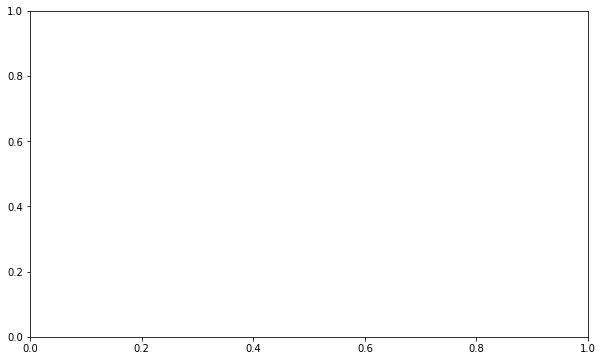

In [106]:
import numpy as np
import matplotlib.pyplot as plt

x_list,z_list,cn_list = O_x_list,O_z_list,O_angle

# 创建一个图形
plt.figure(figsize=(10, 6))

# 使用scatter函数绘制散点图，其中x和z是原子的坐标，c是权重值，s是点的大小
plt.scatter(x_list, z_list, c=cn_list, s=20, cmap='viridis')

# 添加颜色栏
cbar = plt.colorbar()

# # 限制colorbar的标注范围为4到8
# cbar.set_ticks([4, 5, 6, 7, 8])
cbar.set_label('Nb-O-Nb Angle(°)')

# 设置坐标轴标签
plt.xlabel('X')
plt.ylabel('Z')

# 显示图形
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt



# 创建一个图形
plt.figure(figsize=(10, 6))

# 使用scatter函数绘制散点图，其中x和z是原子的坐标，c是权重值，s是点的大小
plt.scatter(error_x_list, error_z_list, s=20, cmap='viridis')

# 添加颜色栏
cbar = plt.colorbar()

# # 限制colorbar的标注范围为4到8
# cbar.set_ticks([4, 5, 6, 7, 8])
# cbar.set_label('Cn')

# 设置坐标轴标签
plt.xlabel('X')
plt.ylabel('Z')

# 显示图形
plt.show()


In [ ]:
len(error_x_list)